Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
''' train_ds have totle 2239
    test_ds have totle 118 files 
    totle =2357 files , and train and test have 9 classe 
'''

' train_ds have totle 2239\n    test_ds have totle 118 files \n    totle =2357 files , and train and test have 9 classe \n'

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

### Create a dataset

Define some parameters for the loader:

In [3]:
batch_size = 32
img_height = 180
img_width = 180
channels = 3

Use 80% of the images for training, and 20% for validation.

In [4]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'Skin cancer ISIC The International Skin Imaging Collaboration\\Train',
    shuffle =True ,
    image_size =(img_height,img_width)  , # image_size =(180,180,3)
    batch_size = batch_size             # 32
)

Found 2239 files belonging to 10 classes.


In [5]:
len(train_ds)

70

The totle files is 2239 and btach_size is 32 

totole_batch = (2239/32) ~ 70

its mean 70 iteration 

In [6]:
# train dataset belong classe name 
train_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'output',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [7]:
# test_data 
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'Skin cancer ISIC The International Skin Imaging Collaboration\\Test',
    shuffle =True ,
    image_size =(img_height,img_width)  , # image_size = (180,180,3)
    batch_size = batch_size             # 32
)

Found 118 files belonging to 9 classes.


The totle files is 118 and btach_size is 32

totole_batch = (118/32) ~ 4

its mean 4 iteration

In [8]:
len(val_ds)

4

In [9]:
# test dataset belong classe name 
val_ds.class_names


['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [10]:
# this is tensore form because multidimension data 
val_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
# convert simple form 
# fetch 1 batch , 1 batch have 32 files  
for image_batch , lable_batch in val_ds.take(1) :
    print('this is one batch shape :',image_batch.shape)  # (batch_size,img_height,img_width,chanells)  
    print('this is lable shape :',lable_batch.shape)


this is one batch shape : (32, 180, 180, 3)
this is lable shape : (32,)


In [12]:
# normal formn 
for image_batch , label_batch in train_ds.take(1):
    print(image_batch.numpy())
    print('\n')
    print('convergt the lable in numeric : ',label_batch.numpy())

[[[[ 14.25        3.9166665   9.5      ]
   [ 15.625       7.75       11.125    ]
   [ 15.875       8.75       12.833334 ]
   ...
   [ 52.500122   31.083435   36.708466 ]
   [ 47.5        26.25       32.625    ]
   [ 45.624985   22.75       28.75     ]]

  [[ 16.25        7.5416665  14.       ]
   [ 17.          8.375      12.75     ]
   [ 22.083332   12.583334   13.458333 ]
   ...
   [ 57.66681    33.291656   37.37497  ]
   [ 51.625      28.625      36.5      ]
   [ 43.291702   24.291702   29.875046 ]]

  [[ 20.375      12.333334   12.791666 ]
   [ 23.875      13.25       16.125    ]
   [ 29.833332   19.208332   20.75     ]
   ...
   [ 62.79184    38.666626   41.5      ]
   [ 56.5        32.         38.375    ]
   [ 44.625015   26.416718   32.374985 ]]

  ...

  [[ 48.958336   23.875      27.875    ]
   [ 50.875      24.25       29.25     ]
   [ 52.666664   27.749998   29.208332 ]
   ...
   [ 49.12503    29.         36.458466 ]
   [ 34.125      22.5        30.       ]
   [ 25.958359  

In [13]:

# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These class_names = orrespond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
n_classes = len(class_names)
print(n_classes)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'output', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
10


### Visualize the data
#### Create a code to visualize one instance of all the nine classes present in the dataset

(32, 180, 180, 3)
[3 4 3 1 3 4 4 1 3 6 6 6 8 7 3 4 7 1 1 3 1 8 4 4 1 9 9 8 6 1 9 2]


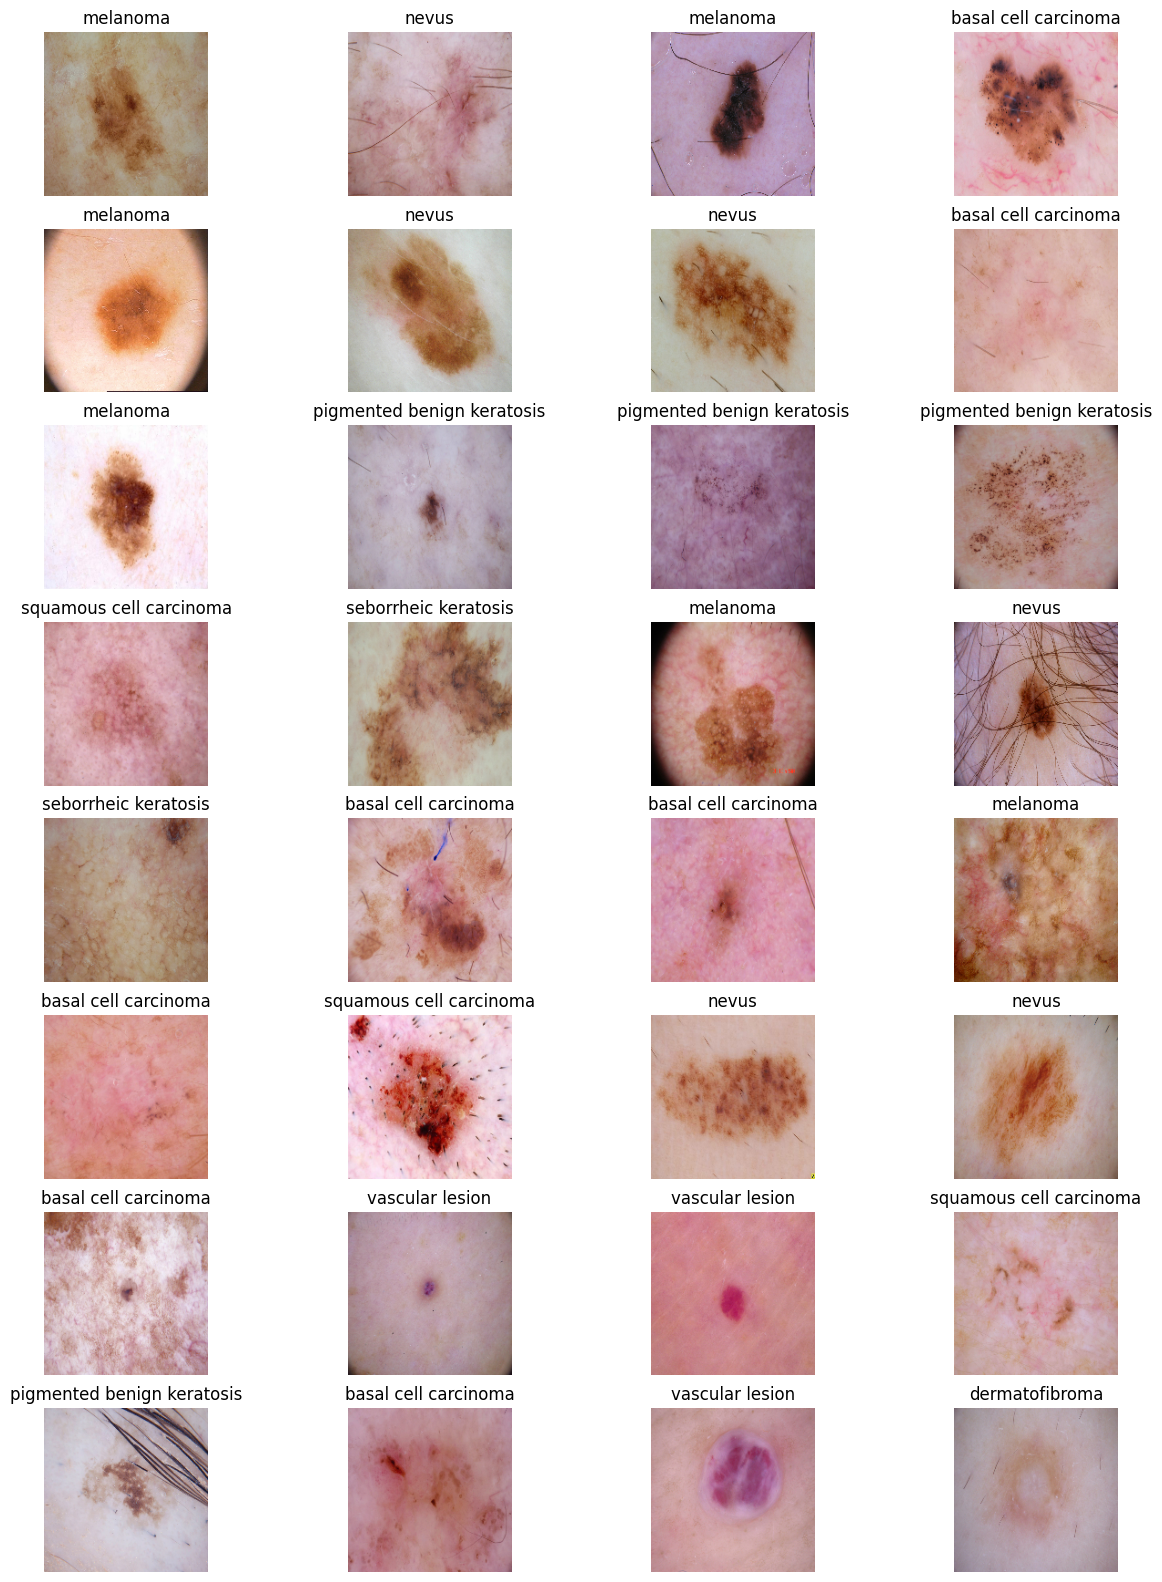

In [14]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(15,20))
for image_batch , labels_batch in train_ds.take(1):
  print(image_batch.shape)
  print(labels_batch.numpy())
  for i in range(32):
    plt.subplot(8,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[labels_batch[i]])
    plt.axis('off')



The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [15]:
# incress the perfomance
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)


In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Resizing, Rescaling
# resize and rescale the value 

#resize_and_rescale = tf.keras.Sequential([
 #   tf.keras.layers.experimental.preprocessing.Resizing(img_height,img_width),
  #  tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
#])

resize_and_rescale = tf.keras.Sequential([
    Resizing(img_height, img_width),
    Rescaling(1.0/255)
])

In [17]:
# data augmentation
# Import necessary modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters
data_augmentation = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=30,
    rescale=1./255  # Rescale pixel values
)


#data_augmentation = tf.keras.Sequential([
 #   tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
  #  tf.keras.layers.experimental.preprocessing.RandomRotation(0.3)
#])

### Create the model
#### Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [18]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D ,BatchNormalization

In [19]:
input_shape = (batch_size , img_height , img_width , channels)

In [20]:
from tensorflow.keras.layers import Input

# Define the input shape
input_layer = Input(shape=input_shape)

# Define the rest of your model
model = Sequential([
    resize_and_rescale,  # Resize and rescale the input images
    Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
    Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.10),
    Dense(n_classes)
])


In [21]:
# create CNN model

#model = Sequential()


#model.add(resize_and_rescale)

#model.add(data_augmentation)

#model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=input_shape))

#model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))

#model.add(MaxPooling2D(2,2))

#model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))

#model.add(MaxPooling2D(2,2))

#model.add(Flatten())

#model.add(Dense(32,activation='relu'))

#model.add(Dense(64,activation='relu'))

#model.add(Dropout(0.10))

#model.add(Dense(n_classes))


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [22]:
### choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.build(input_shape)

In [24]:
# View the summary of all layers
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 180, 180, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 180, 180, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 180, 180, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 90, 90, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 90, 90, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 45, 45, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 129600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 32)                    │       4,147,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 64)                    │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (32, 64)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (32, 10)                    │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,206,314 (16.05 MB)

 Trainable params: 4,206,314 (16.05 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [25]:
epochs = 5

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 68s 899ms/step - accuracy: 0.1962 - loss: 2.3799 - val_accuracy: 0.1356 - val_loss: 2.5377
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 67s 962ms/step - accuracy: 0.2068 - loss: 2.0374 - val_accuracy: 0.0763 - val_loss: 2.7748
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 67s 951ms/step - accuracy: 0.3703 - loss: 1.7702 - val_accuracy: 0.1780 - val_loss: 3.0126
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 62s 882ms/step - accuracy: 0.3377 - loss: 1.7929 - val_accuracy: 0.1017 - val_loss: 2.9786
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 59s 840ms/step - accuracy: 0.4365 - loss: 1.5664 - val_accuracy: 0.1695 - val_loss: 3.3357


In [26]:
# accuracy of model each epochs
history.history['accuracy']

[0.20187583565711975,
 0.2483251392841339,
 0.3827601671218872,
 0.3845466673374176,
 0.4461813271045685]

In [27]:
# validation accuracy of model each epochs
history.history['val_accuracy']

[0.1355932205915451,
 0.0762711837887764,
 0.17796610295772552,
 0.10169491171836853,
 0.16949152946472168]

In [28]:
# lost
history.history['loss']

[2.189918041229248,
 1.9844268560409546,
 1.7118303775787354,
 1.7083384990692139,
 1.566975712776184]

### Visualizing training results

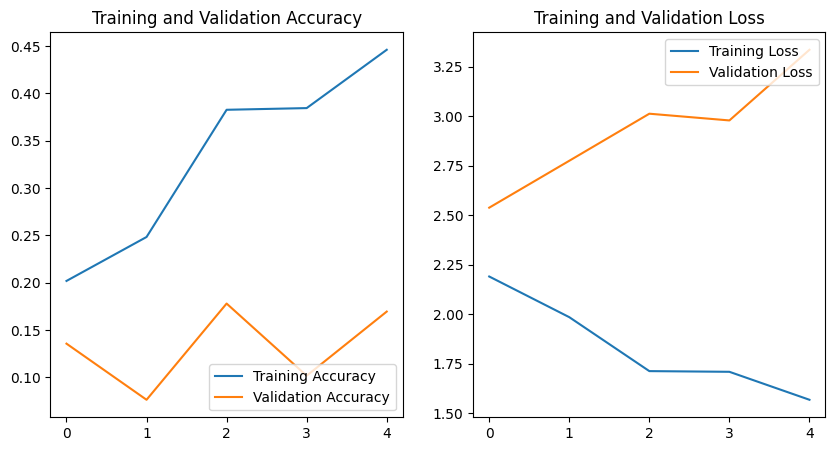

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Findings:
`Traning-accuracy = 48` and 

`validation-accuracy = 37` 

this is underfit model not good acurracy of traning and validation dataset 

In [30]:
# After wee have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

# data augmentation


#data_augmentation = keras.Sequential(
 # [
  #  layers.experimental.preprocessing.RandomFlip("horizontal", 
   #                                              input_shape=(img_height, 
    #                                                          img_width,
     #                                                         3)),
   # layers.experimental.preprocessing.RandomRotation(0.1),
   # layers.experimental.preprocessing.RandomZoom(0.1)
  #]
#)



from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator with desired augmentation parameters
data_augmentation = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)


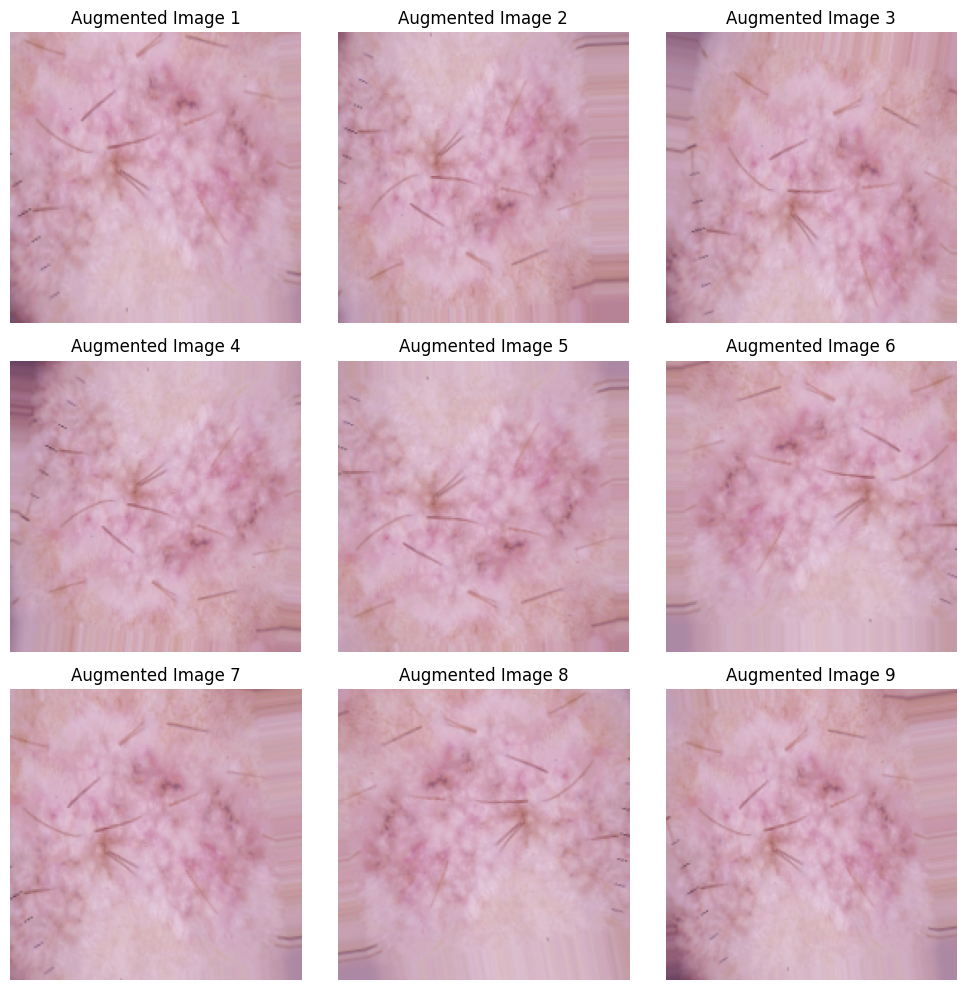

In [31]:
# visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
#plt.figure(figsize=(12, 12))
#for images, labels in train_ds.take(1):
#  for i in range(9):
#    augmented_images = data_augmentation(images)
#    ax = plt.subplot(3, 3, i + 1)
#    plt.imshow(augmented_images[i].numpy().astype("uint8"))
#    plt.title(class_names[labels[i]])
#    plt.axis("off")

import matplotlib.pyplot as plt

# Choose one image from the training dataset
for images, labels in train_ds.take(1):
    image = images[0]  # Take the first image
    label = labels[0]  # Corresponding label

# Reshape the image to (1, height, width, channels) for compatibility with ImageDataGenerator
image = tf.expand_dims(image, 0)

# Generate augmented images
augmented_images = data_augmentation.flow(image)

# Display original image
plt.figure(figsize=(10, 10))
plt.subplot(3, 3, 1)
plt.imshow(image[0].numpy().astype("uint8"))
plt.title("Original Image")
plt.axis("off")

# Display augmented images
for i in range(2, 11):
    augmented_image = next(augmented_images)[0].astype("uint8")
    plt.subplot(3, 3, i - 1)  # Adjusting the index to start from 1
    plt.imshow(augmented_image)
    plt.title(f"Augmented Image {i-1}")
    plt.axis("off")

plt.tight_layout()
plt.show()




### Create the model, compile and train the model


In [32]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

#model = Sequential()

#model.add(data_augmentation)

#model.add(resize_and_rescale)

#model.add(Conv2D(16,kernel_size=(3,3),padding='same',activation='relu'))

#model.add(MaxPooling2D(2,2))

#model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))

#model.add(MaxPooling2D(2,2))


#model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))


#model.add(MaxPooling2D(2,2))

#model.add(Dropout(0.2))


#model.add(Flatten())

#model.add(Dense(128,activation='relu'))

#model.add(Dense(n_classes))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Conv2D(16, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.2),  # Add dropout layer
    Flatten(),
    Dense(128, activation='relu'),
    Dense(n_classes)
])




### Compiling the model

In [33]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [34]:
## Your code goes here, note: train your model for 20 epochs
epochs = 5

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 142ms/step - accuracy: 0.1695 - loss: 61.0803 - val_accuracy: 0.1186 - val_loss: 2.9265
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - accuracy: 0.3585 - loss: 1.8045 - val_accuracy: 0.1949 - val_loss: 3.1082
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.4345 - loss: 1.5955 - val_accuracy: 0.1695 - val_loss: 2.8227
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 0.4527 - loss: 1.5264 - val_accuracy: 0.2203 - val_loss: 2.9241
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.4539 - loss: 1.5581 - val_accuracy: 0.1102 - val_loss: 3.7712


### Visualizing the results

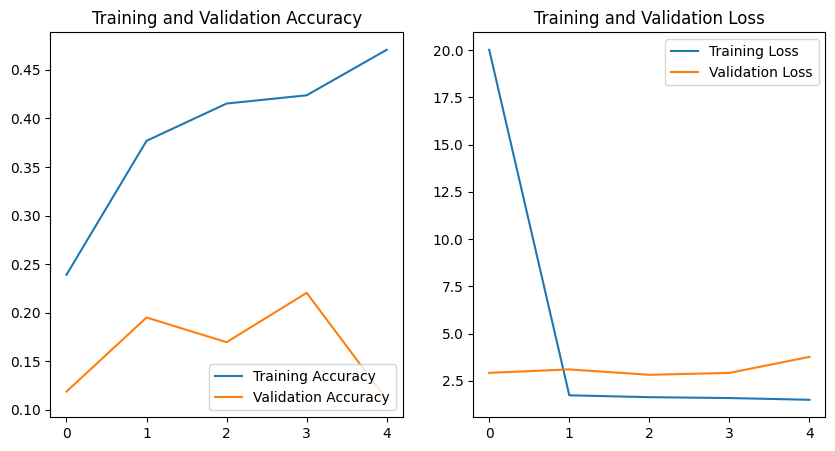

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Findings after the model fit:

This model like underfiting beacuse 

`Traning accuracy = 51 ` and 

`Validation accuracy = 38 `

#### Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [36]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'output',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [37]:
data_dir_train = pathlib.Path(r"Skin cancer ISIC The International Skin Imaging Collaboration\Train")


In [38]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

2239


In [39]:
#plot number of images in each Class
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'/*.jpg'))))


In [40]:
count

[114, 376, 95, 438, 357, 0, 462, 77, 181, 139]

<BarContainer object of 10 artists>

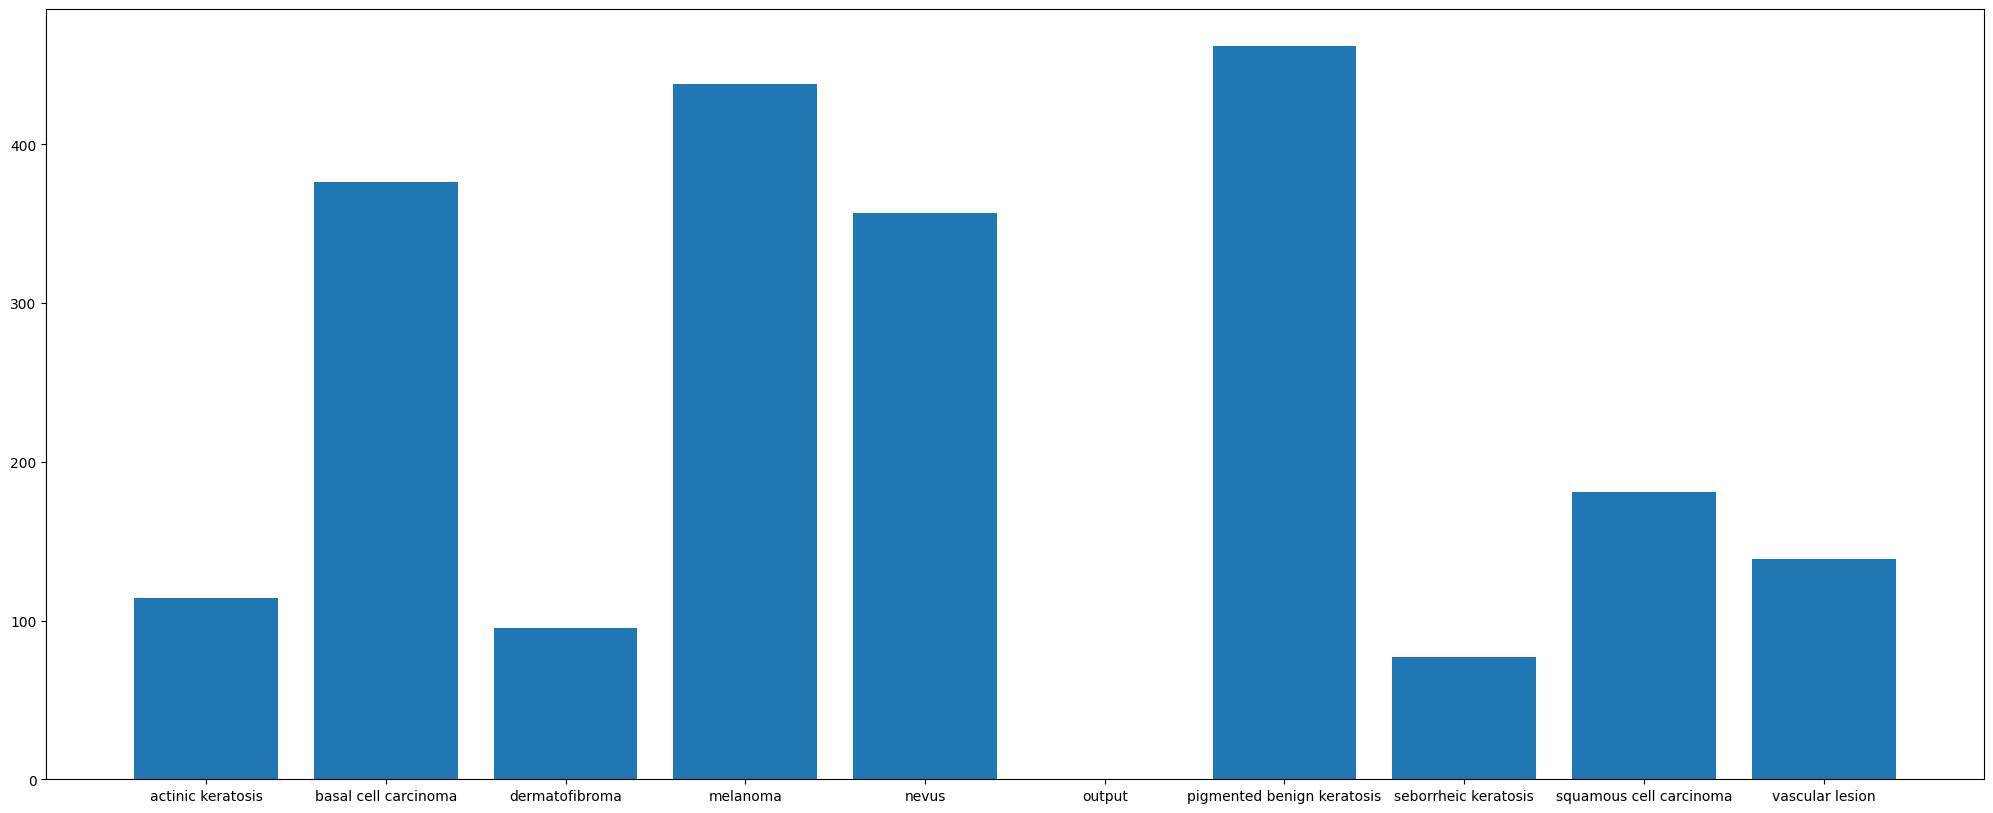

In [41]:
#plot number of images in each Class
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)


#### Findings here: 


In [42]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.
print("Path to training dataset:", path_to_training_dataset)


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [43]:
#Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. 
#Lets take a look at total count of augmented images.

image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

0


#### Lets see the distribution of augmented data after adding new images to the original training data.


<BarContainer object of 10 artists>

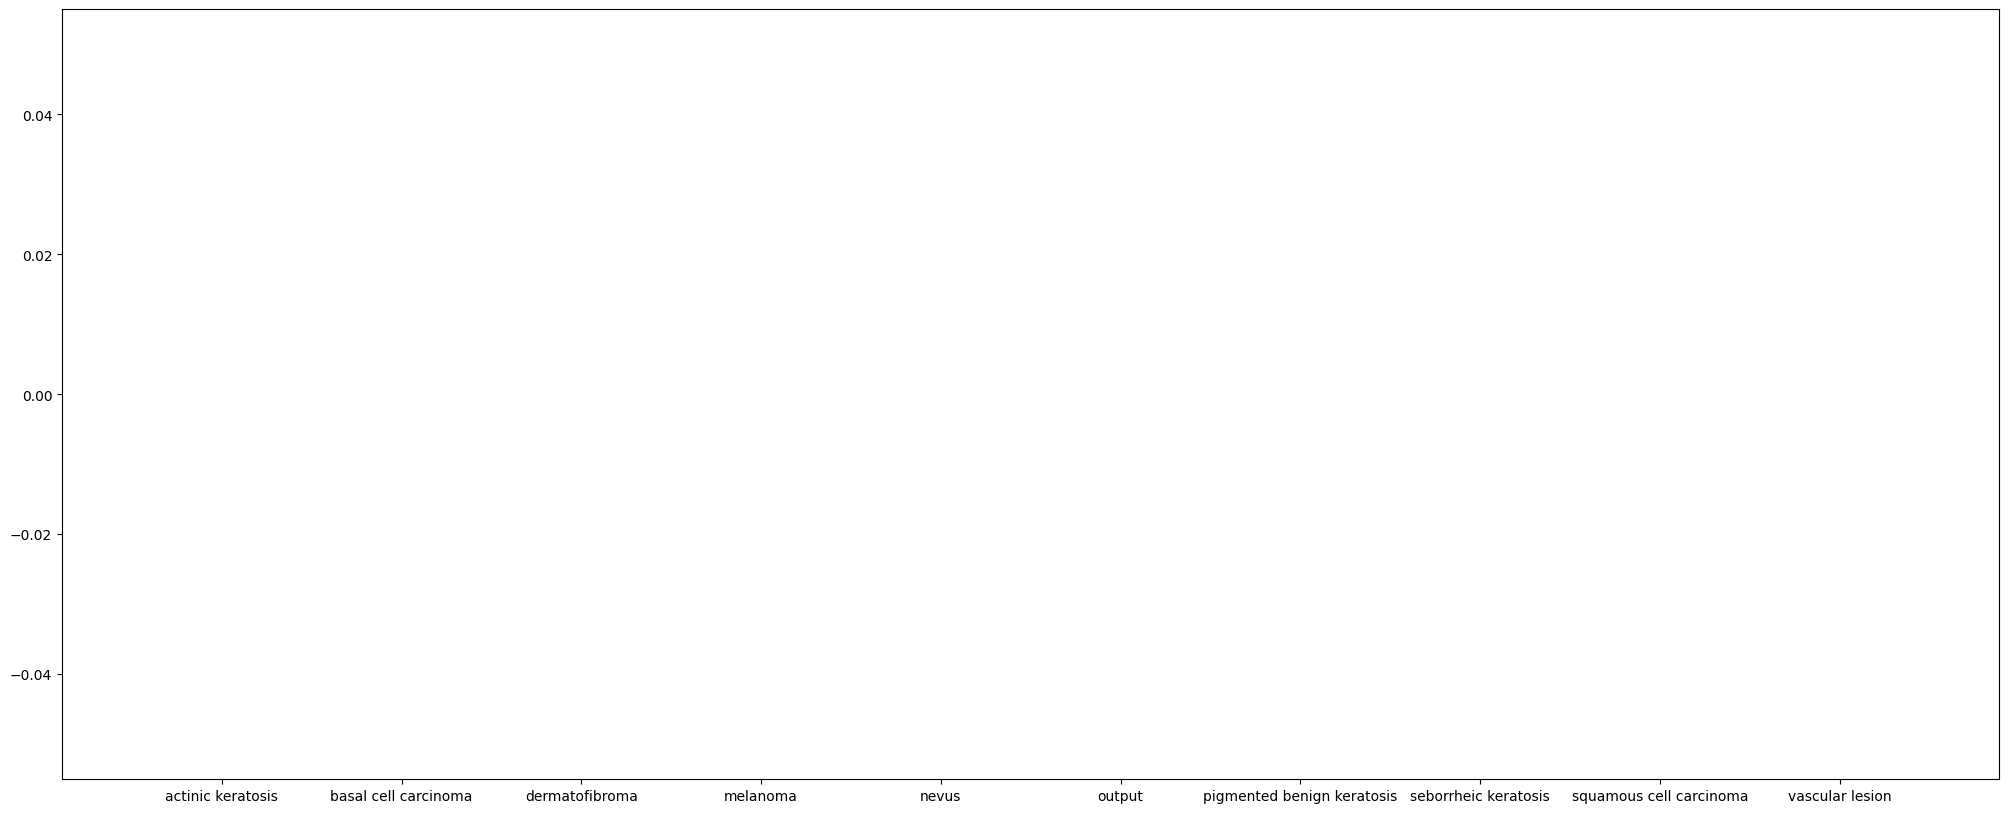

In [44]:
# Check the distribution of data again. 
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'*/output/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

### Lets see the distribution of augmented data after adding new images to the original training data.

In [45]:
import os
from glob import glob

In [46]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

[]

In [47]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

[]

In [48]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [49]:
# Get Existing images in Dataframe
path_list=[]
lesion_list=[]
for name in class_names:
  for file in data_dir_train.glob(name+'/*.jpg'):
    path_list.append(str(file))
    lesion_list.append(name)

dataframe_dict_original=dict(zip(path_list,lesion_list))
original_df=pd.DataFrame(list(dataframe_dict_original.items()),columns=['Path','Label'])

In [50]:
import pandas as pd

# Assuming original_df is already defined or loaded correctly

# Create a new DataFrame from the dictionary
df2 = pd.DataFrame(list(dataframe_dict_new.items()), columns=['Path', 'Label'])

# Concatenate original_df and df2
new_df = pd.concat([original_df, df2], ignore_index=True)


In [51]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Train the model on the data created using Augmentor

In [52]:
batch_size = 32
img_height = 180
img_width = 180

#### Create a training dataset

In [53]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 10 classes.
Using 1792 files for training.


#### Create a validation dataset

In [54]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 10 classes.
Using 447 files for validation.


#### Create a model (Including normalization)

In [55]:
from keras.layers import Rescaling

# Define the Rescaling layer
rescale_layer = Rescaling(1./255)

# Perform data preprocessing: rescaling and augmentation
train_ds = train_ds.map(lambda x, y: (rescale_layer(x), y))
val_ds = val_ds.map(lambda x, y: (rescale_layer(x), y))

# Define the model
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(n_classes)
])

#### Compile your model (Choose optimizer and loss function appropriately)

In [56]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Train your model

In [57]:
epochs = 15

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step - accuracy: 0.2320 - loss: 2.2558 - val_accuracy: 0.2304 - val_loss: 1.9736
Epoch 2/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 184ms/step - accuracy: 0.3305 - loss: 1.7798 - val_accuracy: 0.4720 - val_loss: 1.5066
Epoch 3/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 184ms/step - accuracy: 0.4938 - loss: 1.4597 - val_accuracy: 0.5302 - val_loss: 1.4205
Epoch 4/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 190ms/step - accuracy: 0.4914 - loss: 1.3800 - val_accuracy: 0.5459 - val_loss: 1.4203
Epoch 5/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 189ms/step - accuracy: 0.5382 - loss: 1.2982 - val_accuracy: 0.5123 - val_loss: 1.3835
Epoch 6/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 188ms/step - accuracy: 0.5784 - loss: 1.2144 - val_accuracy: 0.4877 - val_loss: 1.4303
Epoch 7/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 187ms/step - accuracy: 0.5926 - loss: 1.1395 - val_accuracy: 0.5436 - val_loss: 1.4370
Epoch 8/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 186ms/step - accuracy: 0.6292 - loss: 1.0740 - val_accu

#### Visualize the model results

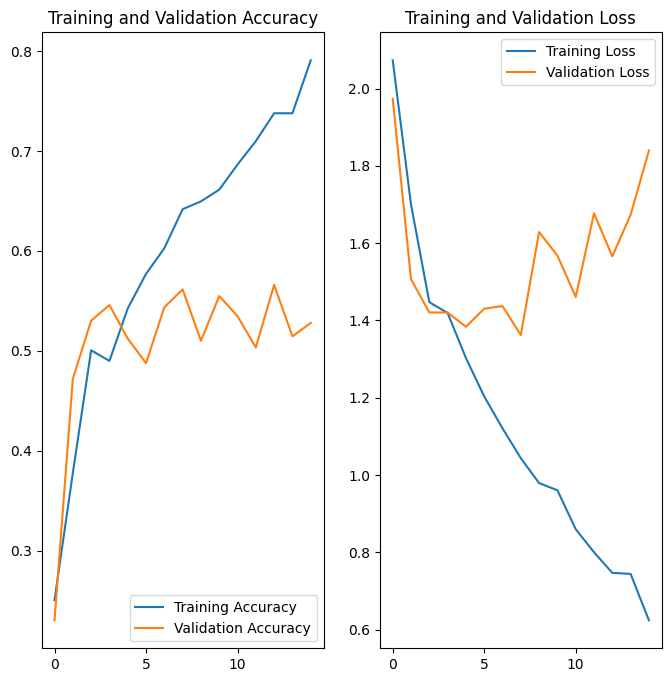

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Hence, at the end we got the following findings:

`Traning Accuracy = 92`

`Validation Accuracy = 80 ` 